In [1]:
import chess.pgn
import pandas as pd
import chess
import numpy as np
from scipy import linalg

In [2]:
ls -shr

total 89M
 20K README.md                              148K chess-values.png
 89M lichess_db_standard_rated_2013-01.pgn   84K chess-and-eigenvectors.ipynb


In [3]:
board = chess.Board()

In [4]:
pgn = open('lichess_db_standard_rated_2013-01.pgn',encoding="utf-8")

In [5]:
#creates a list with one entry for each space on the board
spaces = []
for i in range(1,9):
    for j in range (1,9):
        spaces.append(chr(j+96)+str(i))

In [6]:
#create a matrix to tally weights for every pair of opposing pieces
pieces_list = [space for space in spaces if any(map(space.__contains__, ['1','2','7','8']))]
weights = pd.DataFrame(0,index=pieces_list, columns=pieces_list)

In [7]:
#create a state dictionary of each square and the initial square of each piece
#Those 'None' entries are the empty squares in the middle of the board, before the first move
#Each piece is on it's own square to begin
state_dict = {space:(space  if any(map(space.__contains__, ['1','2','7','8'])) else None) for space  in spaces}
#state_dict

In [23]:
game = chess.pgn.read_game(pgn)

while game is not None:
    if game.headers["BlackElo"] != "?":
        print('black',game.headers["BlackElo"])
        if int(game.headers["BlackElo"]) > 1800 and int(game.headers["WhiteElo"]) > 1800:
            print('black',game.headers["BlackElo"])
            print('white',game.headers["WhiteElo"])

        game = chess.pgn.read_game(pgn)


black 1489
black 1563
black 1578
black 1619
black 1434
black 1692
black 1817
black 1817
white 1816
black 1666
black 1474
black 1457
black 1485
black 1282
black 1539
black 1925
black 1501
black 1370
black 1554
black 1775
black 1562
black 1500
black 1325
black 1712
black 1907
black 1907
white 1908
black 1390
black 1869
black 1297
black 1789
black 1629
black 1580
black 1716
black 1500
black 1935
black 1742
black 1858
black 1387
black 1617
black 1559
black 1478
black 1480
black 1470
black 1924
black 1924
white 1897
black 1721
black 1625
black 1288
black 1679
black 1381
black 856
black 1792
black 1982
black 1982
white 2066
black 1252
black 1653
black 1702
black 1519
black 1729
black 1500
black 1629
black 1484
black 2144
black 2144
white 2114
black 1603
black 1526
black 1478
black 1566
black 1297
black 1707
black 1108
black 1724
black 1828
black 1493
black 1261
black 1407
black 1944
black 1514
black 1482
black 1672
black 1627
black 1349
black 1385
black 1403
black 1398
black 1718
black 2131


black 1203
black 1407
black 1406
black 1581
black 1407
black 1402
black 1676
black 1765
black 1505
black 1259
black 1488
black 1444
black 1429
black 1503
black 1444
black 1323
black 1518
black 1350
black 1580
black 1477
black 1425
black 1482
black 1253
black 1358
black 1548
black 1857
black 1857
white 1886
black 1504
black 1733
black 1524
black 1896
black 1896
white 1846
black 1332
black 1516
black 1752
black 1836
black 1836
white 1905
black 1420
black 1441
black 1580
black 1650
black 1249
black 1460
black 1495
black 1484
black 1324
black 1469
black 1317
black 1363
black 1402
black 1362
black 1534
black 1522
black 1537
black 1400
black 1827
black 1903
black 1903
white 1841
black 1518
black 1410
black 1465
black 1506
black 1855
black 1784
black 1526
black 1526
black 1399
black 1416
black 1425
black 1380
black 1611
black 1425
black 1669
black 1038
black 1620
black 1474
black 1568
black 1722
black 1418
black 1427
black 1422
black 1916
black 1595
black 1681
black 1566
black 1298
black 1922

KeyboardInterrupt: 

In [26]:
game_counter = 0
total_move_counter = 0
game = chess.pgn.read_game(pgn)

while game is not None:
    if game.headers["BlackElo"] != "?" and game.headers["WhiteElo"] != "?":

        if int(game.headers["BlackElo"]) > 1800 and int(game.headers["WhiteElo"]) > 1800:

            counter = 0
            state_dict = {space:(space  if any(map(space.__contains__, ['1','2','7','8'])) else None) for space  in spaces}

            #print(game)
            #do stuff here



            #for each line in the file
            for move in game.mainline_moves():
                counter += 1
                if board.is_pseudo_legal(move):


                    if board.is_capture(move):
                        capturing_piece = state_dict[chess.square_name(move.from_square)]
                        captured_piece = state_dict[chess.square_name(move.to_square)]
                        #print('capturing piece',capturing_piece)
                        #print('captured piece',captured_piece)

                        if board.is_en_passant(move):
                            #do en passant stuff here
                            #print("en passant")


                            #print ('to square',chess.square_name(move.to_square))
                            #print ('to square file',chess.square_file(move.to_square))
                            #print ('to square rank',chess.square_rank(move.to_square))
                            file = chess.square_file(move.to_square)
                            rank = chess.square_rank(move.to_square)

                            if board.turn:
                                #white's turn, take piece behind square where pawn ends up, decrease rank by 1
                                rank = rank-1
                                #print('white')
                            else:
                                #blacks's turn, take piece behind square where pawn ends up
                                rank = rank+1
                                #print("black")
                            take_square = chess.square_name(chess.square(file, rank)) 
                            #print('take square',take_square)

                            #increment an entry in the weights matrix when one piece takes another
                            weights.loc[state_dict[chess.square_name(move.from_square)],state_dict[take_square]] += 1

                            #update the take square to be empty
                            state_dict[take_square] = None

                            #update the piece on the target square
                            state_dict[chess.square_name(move.to_square)] = state_dict[chess.square_name(move.from_square)]

                            #update the source square to be empty
                            state_dict[chess.square_name(move.from_square)] = None

                        elif capturing_piece is not None:
                            if captured_piece is not None:

                                #record the kill in a matrix of all kills
                                #print(counter,chess.square_name(move.from_square), "takes on",chess.square_name(move.to_square))
                                #print(counter,state_dict[chess.square_name(move.from_square)], "takes",state_dict[chess.square_name(move.to_square)])

                                #what piece is there now?


                                #increment an entry in the weights matrix when one piece takes another
                                weights.loc[state_dict[chess.square_name(move.from_square)],state_dict[chess.square_name(move.to_square)]] += 1

                                #update the piece on the target square
                                state_dict[chess.square_name(move.to_square)] = state_dict[chess.square_name(move.from_square)]

                                #update the source square to be empty
                                state_dict[chess.square_name(move.from_square)] = None

                                #board.push(move)  # Make the move


                                #if df.loc[i+1,'move_no'] == 1:
                                #    state_dict = {space:(space  if any(map(space.__contains__, ['1','2','7','8'])) else None) for space  in spaces}

                    else:


                        #add castling special cases to record both moves
                        if board.is_kingside_castling(move):
                            if board.turn:
                                #print(counter,'... and white castles kingside')
                                #move the appopriate rook
                                state_dict['f1'] = 'h1'
                                #leaving the rook source square empty
                                state_dict['h1'] = 'None'
                                #board.push(move)  # Make the move



                            elif not board.turn:
                                #print(counter,'... and black castles kingside')
                                #move the appopriate rook
                                state_dict['f8'] = 'h8'
                                #leaving the rook source square empty
                                state_dict['h8'] = 'None'
                                #board.push(move)  # Make the move

                        elif board.is_queenside_castling(move):
                            if board.turn:
                                #print(counter,'... and white castles queenside')
                                #move the appopriate rook
                                state_dict['d1'] = 'a1'
                                #leaving the rook source square empty
                                state_dict['a1'] = 'None'
                                #board.push(move)  # Make the move

                            elif not board.turn:
                                #print(counter,'... and black castles queenside')
                                #move the appopriate rook
                                state_dict['d8'] = 'a8'
                                #leaving the rook source square empty
                                state_dict['a8'] = 'None'
                                #board.push(move)  # Make the move

                        else:
                            #update the piece on the target square
                            state_dict[chess.square_name(move.to_square)] = state_dict[chess.square_name(move.from_square)]

                            #update the source square to be empty
                            state_dict[chess.square_name(move.from_square)] = None


                            #print(counter, chess.square_name(move.from_square),chess.square_name(move.to_square))

                board.push(move)  # Make the move
                #print(state_dict)

            if board.is_checkmate():
                checkers_list = [state_dict[chess.square_name(x)] for x in list(board.checkers())]
                if checkers_list[0] is not None:
                    piece_giving_check = str(checkers_list[0])

                    if board.turn:
                        captured_king = 'e1'
                    else:
                        captured_king = 'e8'
                    weights.loc[piece_giving_check,captured_king] += 1


            game_counter += 1
            #print('end of game',game_counter)

            total_move_counter += counter
            #print('total moves analyzed',total_move_counter)


            #print('board outcome',board.outcome())


            #print('is game over?',board.is_game_over())
            board.reset()

        game = chess.pgn.read_game(pgn)




    #print(state_dict)

    

KeyboardInterrupt: 

In [27]:
print(game_counter,'games analyzed')
print(total_move_counter,'moves analyzed')

28 games analyzed
2351 moves analyzed


In [28]:
weights

,a1,b1,c1,d1,e1,f1,g1,h1,a2,b2,...,g7,h7,a8,b8,c8,d8,e8,f8,g8,h8
a1,0,0,0,1,0,0,0,0,0,1,...,0,0,7,2,2,1,0,1,1,0
b1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,1,1,0,1,2,0
c1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,5,0,0,0,5,6,2
d1,0,0,0,0,0,0,0,0,0,0,...,2,3,1,0,2,8,1,4,3,3
e1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
f1,0,0,0,0,0,0,0,0,0,0,...,1,2,0,3,7,1,0,0,4,0
g1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,7,2,0,0,1,0,0
h1,0,0,0,0,0,0,0,0,0,0,...,1,0,5,0,0,1,0,0,1,4
a2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
#This still clearly contains some bug or bugs, not sure where the self-captures could be coming from. Possibly a
#mistake in the state dict when accounting for en passants.
#The number of mistakes is still very low, apparently less than one percent, which doesn't skew results all that much.

In [11]:
#subtracting the identity matrix is necessary, forming an implicit set of homogeneous equations
a = weights - np.identity(32)
#print(a)

In [12]:
b = np.zeros(32)
#print(b)

In [13]:
x = linalg.solve(a, b)
x

array([ 0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,
       -0., -0., -0., -0., -0., -0.])

### Why doesn't it work?
### Because the solver is finding the trivial solution. i.e. just a vector full of zeroes.
### To check that there is actually a non trivial solution, the determinant of A must be non-zero.

In [14]:
np.linalg.det(a)

8.477595324290956e+119

### OK since the determinant is not zero, there must be at least one non-trivial solution. How to find it?
### An homogenous linear equation can be solved by finding the eigenvectors.

In [15]:
eigen_values, eigen_vectors = np.linalg.eig(a)  
eigen_vectors

array([[ 0.17853155+0.j,  0.17658335+0.j, -0.24118579+0.j, ...,
        -0.14873992+0.j, -0.15041371+0.j,  0.17807831+0.j],
       [ 0.19359861+0.j,  0.19387402+0.j, -0.02724016+0.j, ...,
         0.00154408+0.j,  0.00293654+0.j,  0.00238546+0.j],
       [ 0.24129191+0.j,  0.23887936+0.j, -0.18636213+0.j, ...,
        -0.02474659+0.j, -0.02076647+0.j, -0.0254878 +0.j],
       ...,
       [ 0.23949465+0.j, -0.23919418+0.j, -0.17522941+0.j, ...,
        -0.13081652+0.j,  0.11463928+0.j, -0.10311071+0.j],
       [ 0.1973653 +0.j, -0.19732985+0.j,  0.00694406+0.j, ...,
         0.08156574+0.j, -0.07186051+0.j,  0.05298552+0.j],
       [ 0.1840589 +0.j, -0.18149763+0.j, -0.25217697+0.j, ...,
         0.09940041+0.j, -0.10291745+0.j,  0.03924622+0.j]])

In [29]:
values = eigen_vectors[:, np.argmax(eigen_values)] 
values
#Notice that the entries of the eigenvector corresponding to the largest eigenvalue are all real valued,
#So it's OK to throw away the imaginary component

array([0.17853155+0.j, 0.19359861+0.j, 0.24129191+0.j, 0.46179917+0.j,
       0.04258898+0.j, 0.23755919+0.j, 0.20797482+0.j, 0.19388739+0.j,
       0.02918162+0.j, 0.06119117+0.j, 0.06202557+0.j, 0.07382312+0.j,
       0.08058662+0.j, 0.06124037+0.j, 0.05327563+0.j, 0.03080381+0.j,
       0.02702661+0.j, 0.06697645+0.j, 0.06730137+0.j, 0.07665119+0.j,
       0.08378771+0.j, 0.06274823+0.j, 0.05385892+0.j, 0.03280015+0.j,
       0.18258961+0.j, 0.19807649+0.j, 0.22923698+0.j, 0.45053278+0.j,
       0.05744983+0.j, 0.23949465+0.j, 0.1973653 +0.j, 0.1840589 +0.j])

In [30]:
## Let's normalize the values


In [31]:
list = []
for i in values:
    list.append(abs(float(i)))

<ipython-input-31-fd238d3eb4fa>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  list.append(abs(float(i)))


In [32]:
#The fractional inverse of the average of all the pawns
factor = 1 / np.mean(list[8:24])

In [33]:
normed = [i*factor for i in list]
#normed

In [34]:
normalized_list = ["%.2f"%i for i in normed]

In [36]:
#tempo difference
white_sum = sum(normed[0:16])
black_sum = sum(normed[16:32])


print('total value of white pieces is', white_sum)
print('total value of black pieces is', black_sum)
print('total difference in value between white and black pieces is', white_sum-black_sum)
print('This is equal to the point value of the tempo advantage for white')

total value of white pieces is 38.28720188860989
total value of black pieces is 38.2975240361024
total difference in value between white and black pieces is -0.01032214749250926
This is equal to the point value of the tempo advantage for white


['3.16', '3.43', '3.97', '7.81', '1.00', '4.15', '3.42', '3.19']
['0.47', '1.16', '1.17', '1.33', '1.45', '1.09', '0.93', '0.57']
['0.51', '1.06', '1.07', '1.28', '1.40', '1.06', '0.92', '0.53']
['3.09', '3.35', '4.18', '8.00', '0.74', '4.12', '3.60', '3.36']


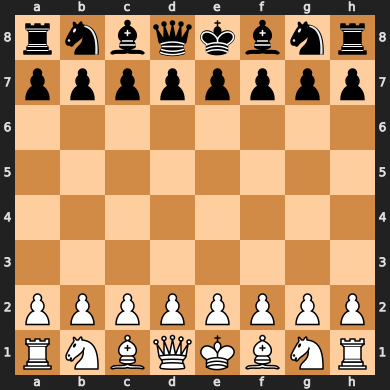

In [35]:
print(normalized_list[24:32])
print(normalized_list[16:24])
print(normalized_list[8:16])
print(normalized_list[0:8])

In [ ]:
if not os.path.isfile('blank-board.png'):
    svg2png(bytestring=chess.svg.board(board),write_to='blank-board.png',scale=2)

In [ ]:
im = cv2.imread('blank-board.png')

In [ ]:
black_major_pieces = ' '.join(normalized_list[24:32])
black_pawns = ' '.join(normalized_list[16:24])
white_pawns = ' '.join(normalized_list[8:16])
white_major_pieces = ' '.join(normalized_list[0:8])

In [ ]:
color = (0, 0, 255)
black = (0, 0, 0)
white = (255, 255, 255)

cv2.putText(img=im, 
            text=black_major_pieces, org=(30, 132), 
            fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1.05, 
            color=white,thickness=2)
cv2.putText(img=im, 
            text=black_pawns, org=(30, 210), 
            fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1.05, 
            color=white,thickness=2)
cv2.putText(img=im, 
            text=white_pawns, org=(30, 584), 
            fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1.05, 
            color=black,thickness=2)
cv2.putText(img=im, 
            text=white_major_pieces, org=(30, 674), 
            fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1.05, 
            color=black,thickness=2)


In [ ]:
fig, ax = plt.subplots(dpi=200)
plt.imshow(im,)

In [ ]:
cv2.imwrite('chess-values.png',im)

In [24]:
#Notice that, for each pair of opposing pawns, the black pawn is stronger in 7 out of 8 pairs
#Why should this be? Possibly because white has the initial tempo for attacking early in the game,
#giving the black pawns many opportunities for capturing pieces defensively, and practically necessitating it.

In [25]:
#find average strength of all the pieces taken by each piece
#eg, rook strength seems low in general, probably because they come out later in the game
#and have fewer opportunities to capture lots of pieces,
#but they probably capture, on average, stronger pieces, in proportion to their own strength 